In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import myML

In [2]:
def func(xx):
    d = xx.shape[0]
    f = (10*d)*np.ones((1,xx.shape[1]))
    for i in range(d):
        f += xx[i,:]**2-10*np.cos(2*np.pi*xx[i,:])
    return f

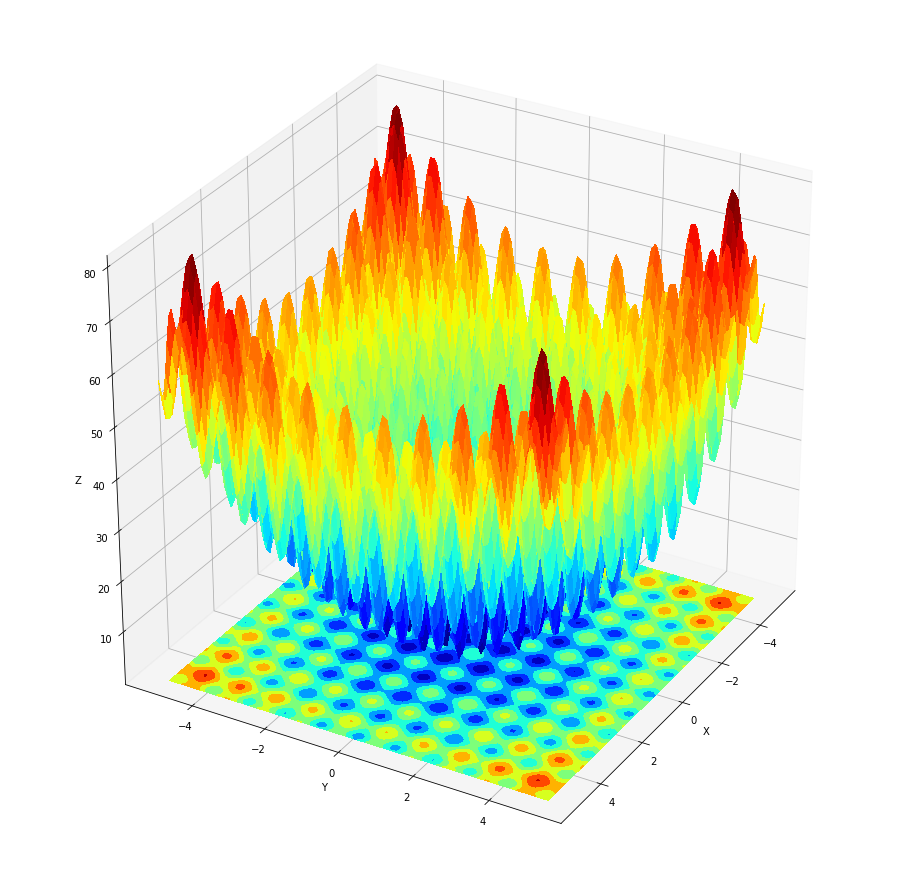

In [3]:
fig = plt.figure(figsize=(16,16))
ax = plt.axes(projection='3d')
points = 100
x = np.linspace(-5.12, 5.12, points)
x, y = np.meshgrid(x,x)
z = np.zeros((points,points))
for i in range(points):
    for j in range(points):
        vector = np.array([[x[i,j]],[y[i,j]]])
        z[i,j] = func(vector)[0,0]

ax.plot_surface(x,y,z, rstride=1, cstride=1, facecolors=cm.jet(z/z.max()), linewidth=0.1, antialiased=False, shade=False)
ax.contourf(x, y, z, zdir='z', offset=-1, cmap=cm.jet)
ax.dist=12
ax.view_init(30, 30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
#print(x)
#y = func(x)

Simulated annealing: [ 0.00615229 -0.00246289]
Particle Swarm Optimization: [-0.01789235  0.00703509]
Genetic Algorithm:
[-0.01051116 -0.01248044]


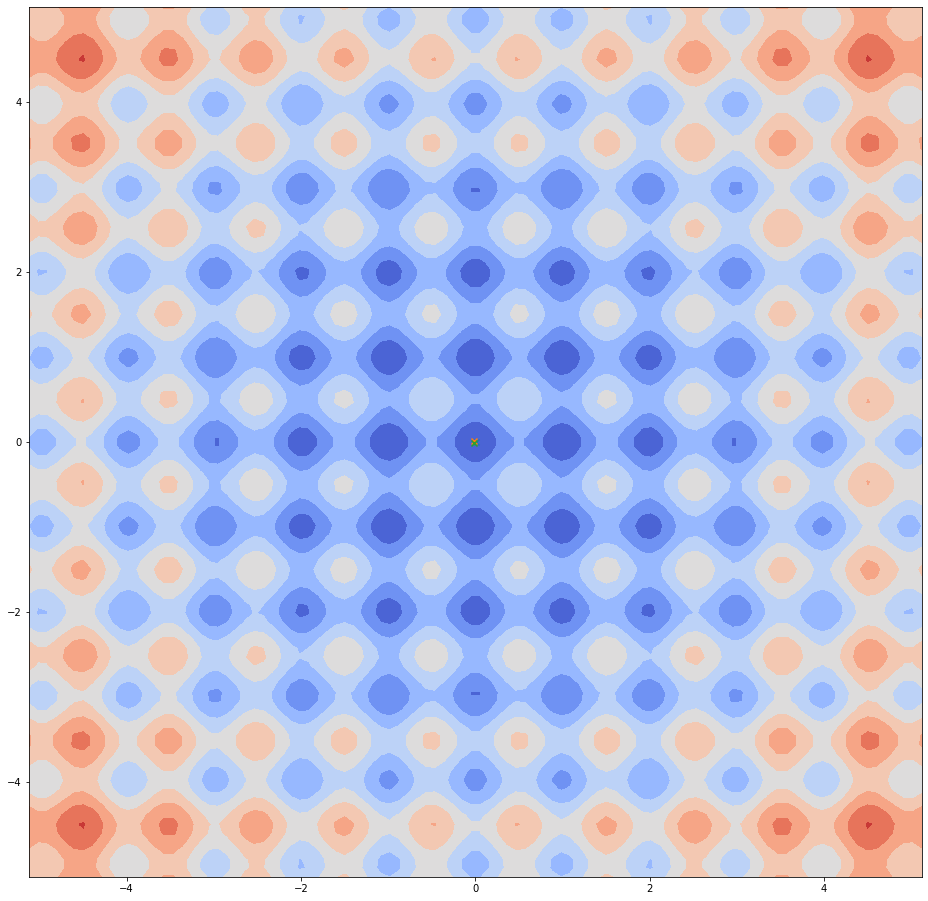

In [3]:
fig = plt.figure(figsize=(16,16))
ax = plt.axes()
points = 100
x = np.linspace(-5.12, 5.12, points)
x, y = np.meshgrid(x,x)
z = np.zeros((points,points))
for i in range(points):
    for j in range(points):
        vector = np.array([[x[i,j]],[y[i,j]]])
        z[i,j] = func(vector)[0,0]
ax.contourf(x, y, z, cmap=cm.coolwarm)

f = myML.negative(func)
x = myML.SA([5.12, 5.12], [-5.12, -5.12], f.neg, 1000)
print('Simulated annealing: '+str(x[:,0]))
ax.scatter(x[0,0],x[1,0],marker='x')

x = myML.PSO([5.12, 5.12], [-5.12, -5.12], f.neg, 1000)
print('Particle Swarm Optimization: '+str(x[:,0]))
ax.scatter(x[0,0],x[1,0],marker='x')

x = myML.GA([5.12, 5.12], [-5.12, -5.12], f.neg, 300, 100, 2)
print('Genetic Algorithm:\n'+str(x[:,0]))
ax.scatter(x[0,0],x[1,0],marker='x')

plt.show()